D:\anaconda\Anaconda\envs\tensorflow\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
D:\anaconda\Anaconda\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
D:\anaconda\Anaconda\envs\tensorflow\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)
D:\anaconda\Anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\anaconda\Anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8

retrain/images/img_1.jpg


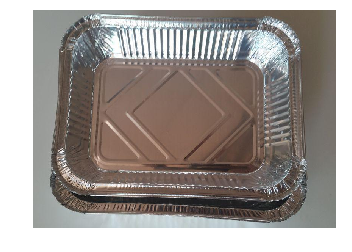

[2 4 5 1 0 3]
metal (score = 0.48896)
plastic (score = 0.28148)
trash (score = 0.06431)
glass (score = 0.06117)
cardboard (score = 0.05933)
paper (score = 0.04476)

retrain/images/img_12078.jpg


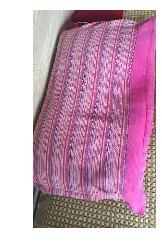

[3 2 0 5 4 1]
paper (score = 0.30795)
metal (score = 0.27262)
cardboard (score = 0.13640)
trash (score = 0.11162)
plastic (score = 0.11046)
glass (score = 0.06095)

retrain/images/img_12081.jpg


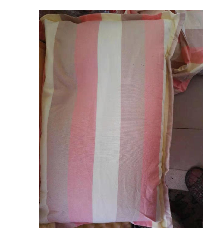

[3 0 2 5 1 4]
paper (score = 0.39695)
cardboard (score = 0.24001)
metal (score = 0.13405)
trash (score = 0.10523)
glass (score = 0.06309)
plastic (score = 0.06067)

retrain/images/img_12103.jpg


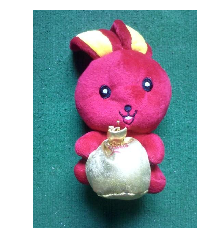

[4 3 2 5 0 1]
plastic (score = 0.25761)
paper (score = 0.22269)
metal (score = 0.15592)
trash (score = 0.13622)
cardboard (score = 0.12254)
glass (score = 0.10503)

retrain/images/img_12106.jpg


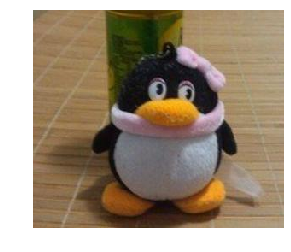

[2 1 4 3 5 0]
metal (score = 0.37567)
glass (score = 0.27323)
plastic (score = 0.11681)
paper (score = 0.08602)
trash (score = 0.07794)
cardboard (score = 0.07032)

retrain/images/img_19727.jpg


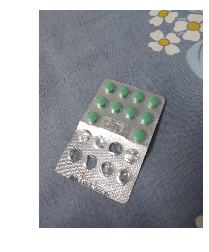

[3 4 2 5 0 1]
paper (score = 0.29112)
plastic (score = 0.24405)
metal (score = 0.15745)
trash (score = 0.15041)
cardboard (score = 0.10600)
glass (score = 0.05097)

retrain/images/img_19733.jpg


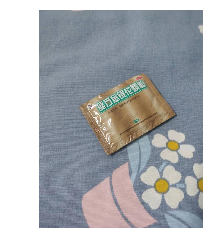

[3 5 0 2 4 1]
paper (score = 0.53475)
trash (score = 0.13071)
cardboard (score = 0.12012)
metal (score = 0.09425)
plastic (score = 0.08158)
glass (score = 0.03860)

retrain/images/img_2.jpg


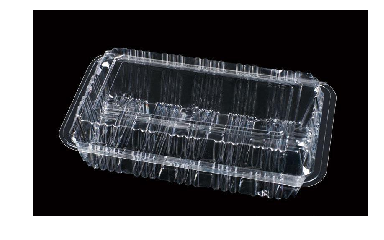

[4 1 2 3 0 5]
plastic (score = 0.59655)
glass (score = 0.10812)
metal (score = 0.09092)
paper (score = 0.08058)
cardboard (score = 0.06685)
trash (score = 0.05698)

retrain/images/img_343.jpg


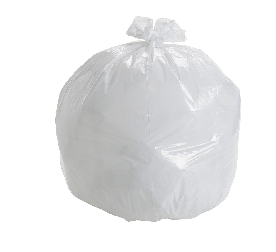

[5 2 4 3 1 0]
trash (score = 0.51044)
metal (score = 0.18405)
plastic (score = 0.18078)
paper (score = 0.06763)
glass (score = 0.02980)
cardboard (score = 0.02729)

retrain/images/img_344.jpg


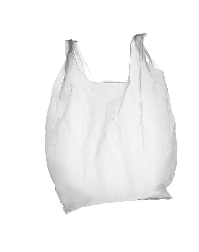

[5 4 3 2 1 0]
trash (score = 0.52439)
plastic (score = 0.14427)
paper (score = 0.13020)
metal (score = 0.09479)
glass (score = 0.06155)
cardboard (score = 0.04480)

retrain/images/img_347.jpg


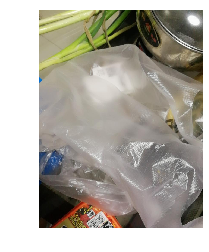

[2 4 5 1 3 0]
metal (score = 0.55176)
plastic (score = 0.25105)
trash (score = 0.07704)
glass (score = 0.05806)
paper (score = 0.04629)
cardboard (score = 0.01580)

retrain/images/img_3873.jpg


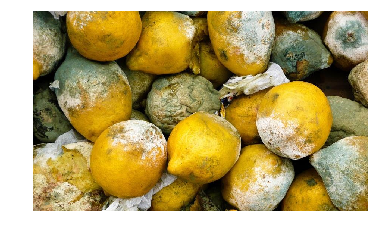

[2 4 5 0 1 3]
metal (score = 0.31224)
plastic (score = 0.16147)
trash (score = 0.15908)
cardboard (score = 0.13201)
glass (score = 0.11875)
paper (score = 0.11645)

retrain/images/img_3874.jpg


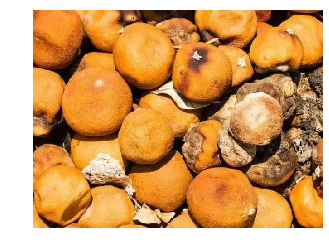

[2 5 0 3 4 1]
metal (score = 0.23465)
trash (score = 0.22153)
cardboard (score = 0.21402)
paper (score = 0.12732)
plastic (score = 0.11234)
glass (score = 0.09014)

retrain/images/img_3881.jpg


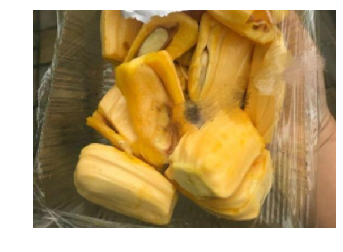

[0 5 2 4 3 1]
cardboard (score = 0.25250)
trash (score = 0.20121)
metal (score = 0.19103)
plastic (score = 0.13470)
paper (score = 0.12936)
glass (score = 0.09121)

retrain/images/img_4.jpg


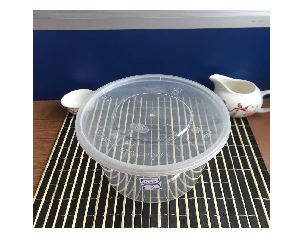

[4 2 3 1 0 5]
plastic (score = 0.37771)
metal (score = 0.24442)
paper (score = 0.14232)
glass (score = 0.09823)
cardboard (score = 0.08527)
trash (score = 0.05205)



In [1]:
# coding: utf-8

import tensorflow as tf
import os
import numpy as np
import re
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

lines = tf.gfile.GFile('retrain/output_labels.txt').readlines()
uid_to_human = {}
# 一行一行读取数据
for uid,line in enumerate(lines):
    #去掉换行符
    line=line.strip('\n')
    uid_to_human[uid] = line


def id_to_string(node_id):
    if node_id not in uid_to_human:
        return ''
    return uid_to_human[node_id]


# 创建一个图来存放google训练好的模型
with tf.gfile.FastGFile('retrain/output_graph.pb', 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    tf.import_graph_def(graph_def, name='')


with tf.Session() as sess:
    softmax_tensor = sess.graph.get_tensor_by_name('final_result:0')
    #遍历目录
    for root,dirs,files in os.walk('retrain/images/'):
        for file in files:
            #载入图片
            image_data = tf.gfile.FastGFile(os.path.join(root,file), 'rb').read()
            predictions = sess.run(softmax_tensor, {'DecodeJpeg/contents:0': image_data})  # 图片格式是jpg格式
            predictions = np.squeeze(predictions)  # 把结果转为1维数据

            #打印图片路径及名称
            image_path = os.path.join(root,file)
            print(image_path)
            #显示图片
            img=Image.open(image_path)
            plt.imshow(img)
            plt.axis('off')
            plt.show()

            #排序
            top_k = predictions.argsort()[::-1]
            print(top_k)
            for node_id in top_k:     
                #获取分类名称
                human_string = id_to_string(node_id)
                #获取该分类的置信度
                score = predictions[node_id]
                print('%s (score = %.5f)' % (human_string, score))
            print()